In [181]:
import matplotlib.pyplot as plt
import numpy as np
import csv

Defining the parameters 
- Mass Flow Rate ($\dot{m}$)
- spheat

In [182]:
#massflowrates (kg/s)
massFlowOil = 0.03
massFlowWater = 0.1

#sp heat (J/kg-K)
spHeatOil = 2131
spHeatWater = 4178

#inlet temps (K)
tempInOil = 160 #433.15 
tempInWater = 35 #308.15

#dynamic viscosity (N-s/m^2)
viscOil = 3.25e-2 
viscWater = 725e-6

#Thermal Conductivity (W/m-K)
kOil = 0.138 
kWater = 0.625

#Prandtl Number
prOil = 501 
prWater = 4.85 

#hydrauilic diameter (m)
dOil = 30e-3 
dWaterO = 50e-3
dWaterI = 34e-3
dWater = dWaterO - dWaterI

#HE material properties Copper
price = 9.25 #£/
densityCu = 8900 #kg/m^3
kCu = 400 #W/m-K

#fin properties
w = 7e-3
t = 2e-3
Length = 2
num = 2

Evaluating the values of Heat Capacity($C$) & Reynolds Number($Re$)

$$ C = spheat\cdot\dot{m} $$

$$ Re = \frac{4\cdot\dot{m}\cdot d}{\pi\cdot d^2\cdot\mu}$$
 

In [183]:
cMin = spHeatOil*massFlowOil
cMax = spHeatWater*massFlowWater

cR = cMin/cMax

reOil = (4*massFlowOil*dOil)/(np.pi*dOil**2*viscOil)

reWater = (massFlowWater*dWater)/((np.pi*((dWaterO**2-dWaterI**2)/4)-(num*t*w))*viscWater) #if re > 3000

From the Reynolds numbers, it can be inferred that 
- The flow in hot fluid is laminar and assuming a constant heat flux condition, we can take the value of Nusselt number
  - ($N_{Uoil}$) = 4.36
- The flow in cold fluid is assumed as turbulent as it $Re\approx2300$ and Nu 

In [184]:
nuOil = 4.36
approxL = np.linspace(1,100,100)
# approxL = [1,83]

def nuOiltest(al,adOil,areOil,aprOil):
    d = adOil/al        
    return (3.66+((0.0668*d*areOil*aprOil)/(1+(0.04*(pow(d*areOil*aprOil,2/3))))))

def nuWatercalc(re,pr,len,d):

    c = 1
    m = 2/3
    x = len/d
    f = pow((0.790*np.log(re))-1.64,-2)
    nufd = ((f/8)*(re-1000)*pr)/(1+((12.7*pow(f/8,1/2))*(pow(pr,2/3)-1)))

    Nu = nufd*(1+(c/pow(x,m)))
       
    return Nu, nufd

def fineff(w,t,num,Length,h):
    
    af = num * ((2*w*Length)+(t*Length))
    a = af + (((np.pi*34e-3) - (num*t))*Length)
    m = pow((2*h)/(kCu*t),1/2)
    z = m*w
    nf = np.tanh(z)/z

    no = 1-((af/a)*(1-nf))

    return no,a,af,nf

In [185]:
fineff(w,t,num,Length,549.16)

(0.9948167760657046, 0.2696283004441059, 0.064, 0.9781633771839802)

In [186]:
hOil = (nuOil * kOil)/dOil

tempOutWater = []
tempOutOil = []

for L in approxL:
    
    x,y =  nuWatercalc(reWater,prWater,L,dWater)

    if L/dWater < 60:
        nuWater = x

    else:
         nuWater = y
    
    nuWater = 4.36   #since re < 3000 
    hWater = (nuWater * kWater)/dWater
    rWall = np.log(dWaterI/dOil)/((2*np.pi*kCu)*L)

    aOil = dOil*L*np.pi
    af = num * ((2*w*L)+(t*L))
    aWater = af + (((np.pi*34e-3) - (num*t))*L)
    
    
    ha = hOil*aOil
    hb = hWater*aWater

    n0, surfArea, finArea, finefficin = fineff(w,t,num,L,hWater)
    
    overallH = (1/(ha)) + rWall + (1/(n0*hb))
    a = 1/overallH

    NTU = a/cMin
    
    b = NTU*(1 - cR)

    effectiveness = (1-np.exp(-b))/(1-(cR*np.exp(-b)))
    
    c = ((effectiveness*cMin*(tempInOil-tempInWater))/cMax) + tempInWater
    tempOutWater.append(c)
    d = tempInOil - ((cMax/cMin)*(c - tempInWater))
    
    tempOutOil.append(d)
     


Generating a .csv file with all the data

In [187]:
mixedListFields = ['Length(m)','Temp Oil Outlet (C)', 'Temp Water Outlet (C)']
mixedList = []
for a in range (0,100):
    mixedList.append([approxL[a],tempOutOil[a],tempOutWater[a]])

with open('Data2.csv', 'w') as f:
    write = csv.writer(f)
    write.writerow(mixedListFields)
    write.writerows(mixedList)

Text(0, 0.5, 'Outlet Temperature of Oil (in C)')

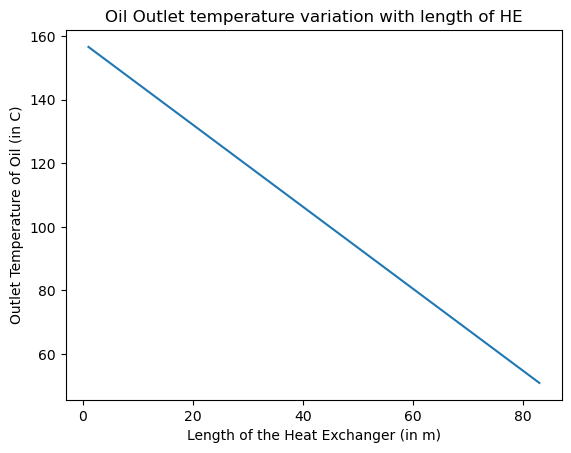

In [188]:
plt.plot(approxL,tempOutOil)
plt.title('Oil Outlet temperature variation with length of HE')
plt.xlabel('Length of the Heat Exchanger (in m)')
plt.ylabel('Outlet Temperature of Oil (in C)')

Text(0, 0.5, 'Outlet Temperature of Water (in C)')

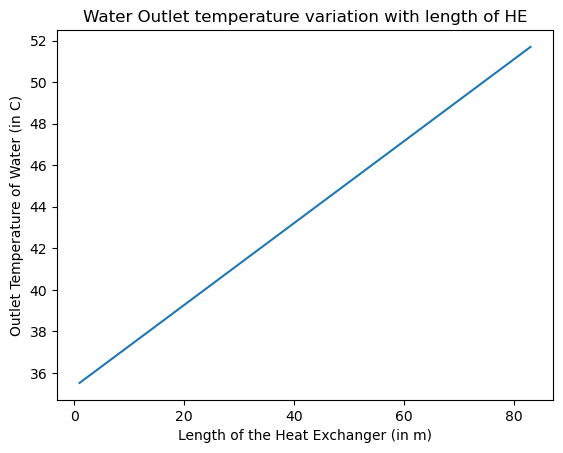

In [189]:
plt.plot(approxL,tempOutWater)
plt.title('Water Outlet temperature variation with length of HE')
plt.xlabel('Length of the Heat Exchanger (in m)')
plt.ylabel('Outlet Temperature of Water (in C)')

In [190]:
tempOutOil[1]

50.87696924912528

In [191]:
tempOutWater[1]

51.69754752490048

In [192]:
# tempOutOil[81]